#### Dharavath Ramdas
linkedin link:https://www.linkedin.com/in/dharavath-ramdas-a283aa213/   
Githublink: https://github.com/dharavathramdas101

# Project Title: Predict Bank Credit Risk using South German Credit Data

## Technologies Machine Learning
## Domain Banking

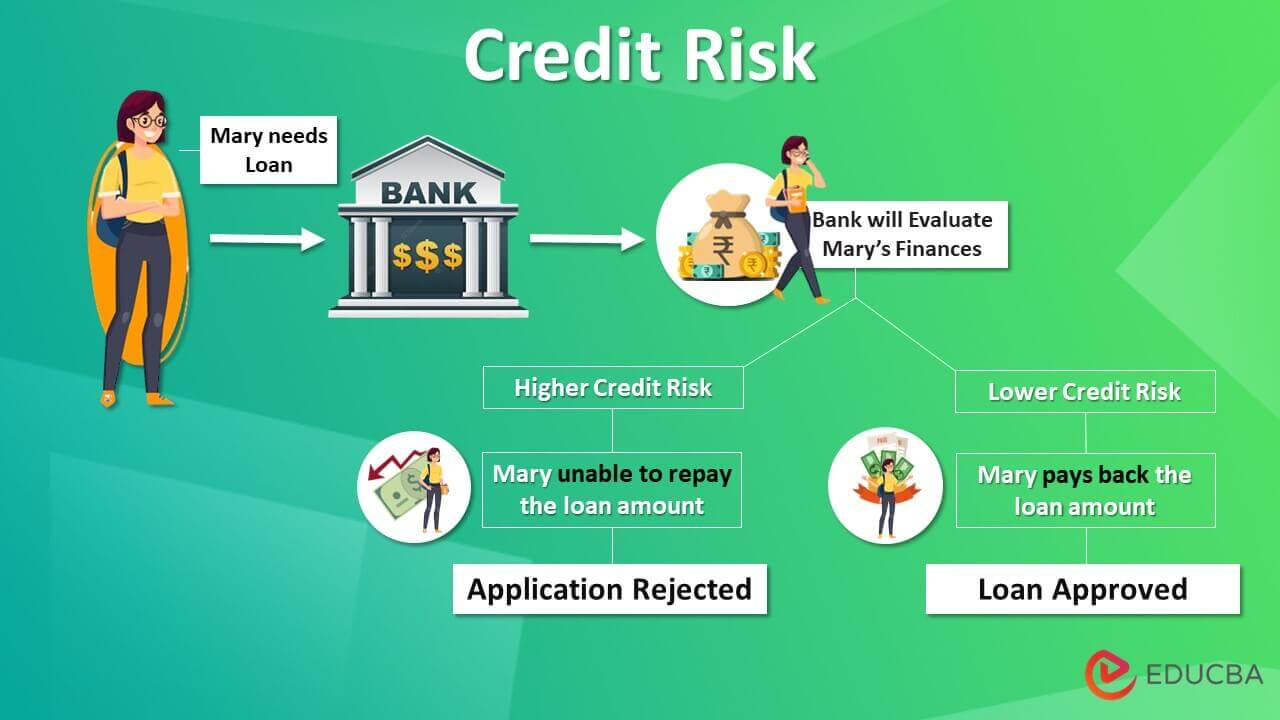

In [107]:
#@title 
from IPython import display
display.Image("/content/Credit-Risk.jpg",width=1000,height = 500)

## Life cycle of Machine learning Project

1.Understanding the Problem Statement   
2.Data Collection    
3.Exploratory data analysis   
4.Data Cleaning   
5.Data Pre-Processing   
6.Model Training   
7.Choose best model   

## 1.Understanding the Problem Statement
Normally, most of the bank's wealth is obtained from providing credit loans so that a
marketing bank must be able to reduce the risk of non-performing credit loans. The risk
of providing loans can be minimized by studying patterns from existing lending data.
One technique that you can use to solve this problem is to use data mining techniques.
Data mining makes it possible to find hidden information from large data sets by way of
classification.
The goal of this project, you have to build a model to predict whether the person,
described by the attributes of the dataset, is a good (1) or a bad (0) credit risk

## 2.Data Collection.
The Dataset is collected from UIC machine learning repository Dataset link : https://archive.ics.uci.edu/ml/datasets/South+German+Credit#

In [11]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline


In [87]:
df.to_csv('South_German_Bank_Credit_Risk_dataset.csv')

In [89]:
df = pd.read_csv(r"South_German_Bank_Credit_Risk_dataset.csv")
df.head()

,Unnamed: 0,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,2,21,1,3,2,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,36,2,3,1,1,1
2,2,2,12,2,9,841,2,4,2,2,1,23,1,2,2,1,1
3,3,1,12,4,0,2122,1,3,3,3,1,39,2,2,1,1,1
4,4,1,12,4,0,2171,1,3,4,3,2,38,2,2,2,1,1


## 3.Exploratory data analysis

In [91]:
df.columns

Index(['Unnamed: 0', 'status', 'duration', 'credit_history', 'purpose',
       'amount', 'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'property', 'age', 'number_credits', 'job',
       'people_liable', 'telephone', 'credit_risk'],
      dtype='object')

In [93]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
0,1,18,4,2,1049,1,2,4,2,2,21,1,3,2,1,1
1,1,9,4,0,2799,1,3,2,3,1,36,2,3,1,1,1
2,2,12,2,9,841,2,4,2,2,1,23,1,2,2,1,1
3,1,12,4,0,2122,1,3,3,3,1,39,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,2,38,2,2,2,1,1


In [92]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [94]:
df.shape

(1000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   status               1000 non-null   int64
 1   duration             1000 non-null   int64
 2   credit_history       1000 non-null   int64
 3   purpose              1000 non-null   int64
 4   amount               1000 non-null   int64
 5   savings              1000 non-null   int64
 6   employment_duration  1000 non-null   int64
 7   installment_rate     1000 non-null   int64
 8   personal_status_sex  1000 non-null   int64
 9   property             1000 non-null   int64
 10  age                  1000 non-null   int64
 11  number_credits       1000 non-null   int64
 12  job                  1000 non-null   int64
 13  people_liable        1000 non-null   int64
 14  telephone            1000 non-null   int64
 15  credit_risk          1000 non-null   int64
dtypes: int64(16)
memory usage

In [7]:
df['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

## 4.Data Cleaning and 5.Data Pre-Processing

In [8]:
df.isnull().sum()

status                 0
duration               0
credit_history         0
purpose                0
amount                 0
savings                0
employment_duration    0
installment_rate       0
personal_status_sex    0
property               0
age                    0
number_credits         0
job                    0
people_liable          0
telephone              0
credit_risk            0
dtype: int64

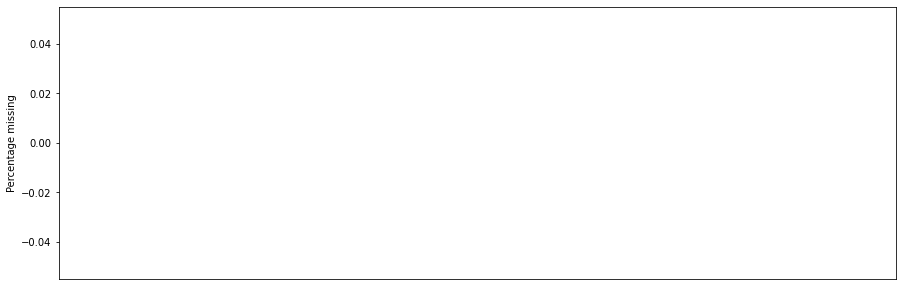

In [13]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [9]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,2.358000,35.54200,1.407000,2.904000,1.845000,1.404000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,1.050209,11.35267,0.577654,0.653614,0.362086,0.490943,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,27.00000,1.000000,3.000000,2.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,2.000000,33.00000,1.000000,3.000000,2.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,3.000000,42.00000,2.000000,3.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,4.000000,75.00000,4.000000,4.000000,2.000000,2.000000,1.000000


In [21]:
df.head(2)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
0,1,18,4,2,1049,1,2,4,2,2,21,1,3,2,1,1
1,1,9,4,0,2799,1,3,2,3,1,36,2,3,1,1,1


Positive: 700, Negative: 300


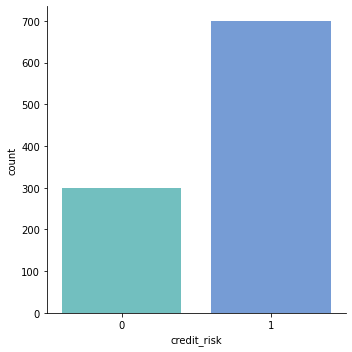

In [22]:
pos = df[df['credit_risk']==1].shape[0]
neg = df[df['credit_risk']==0].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="credit_risk", kind="count", palette="winter_r", alpha=.6)
plt.show()

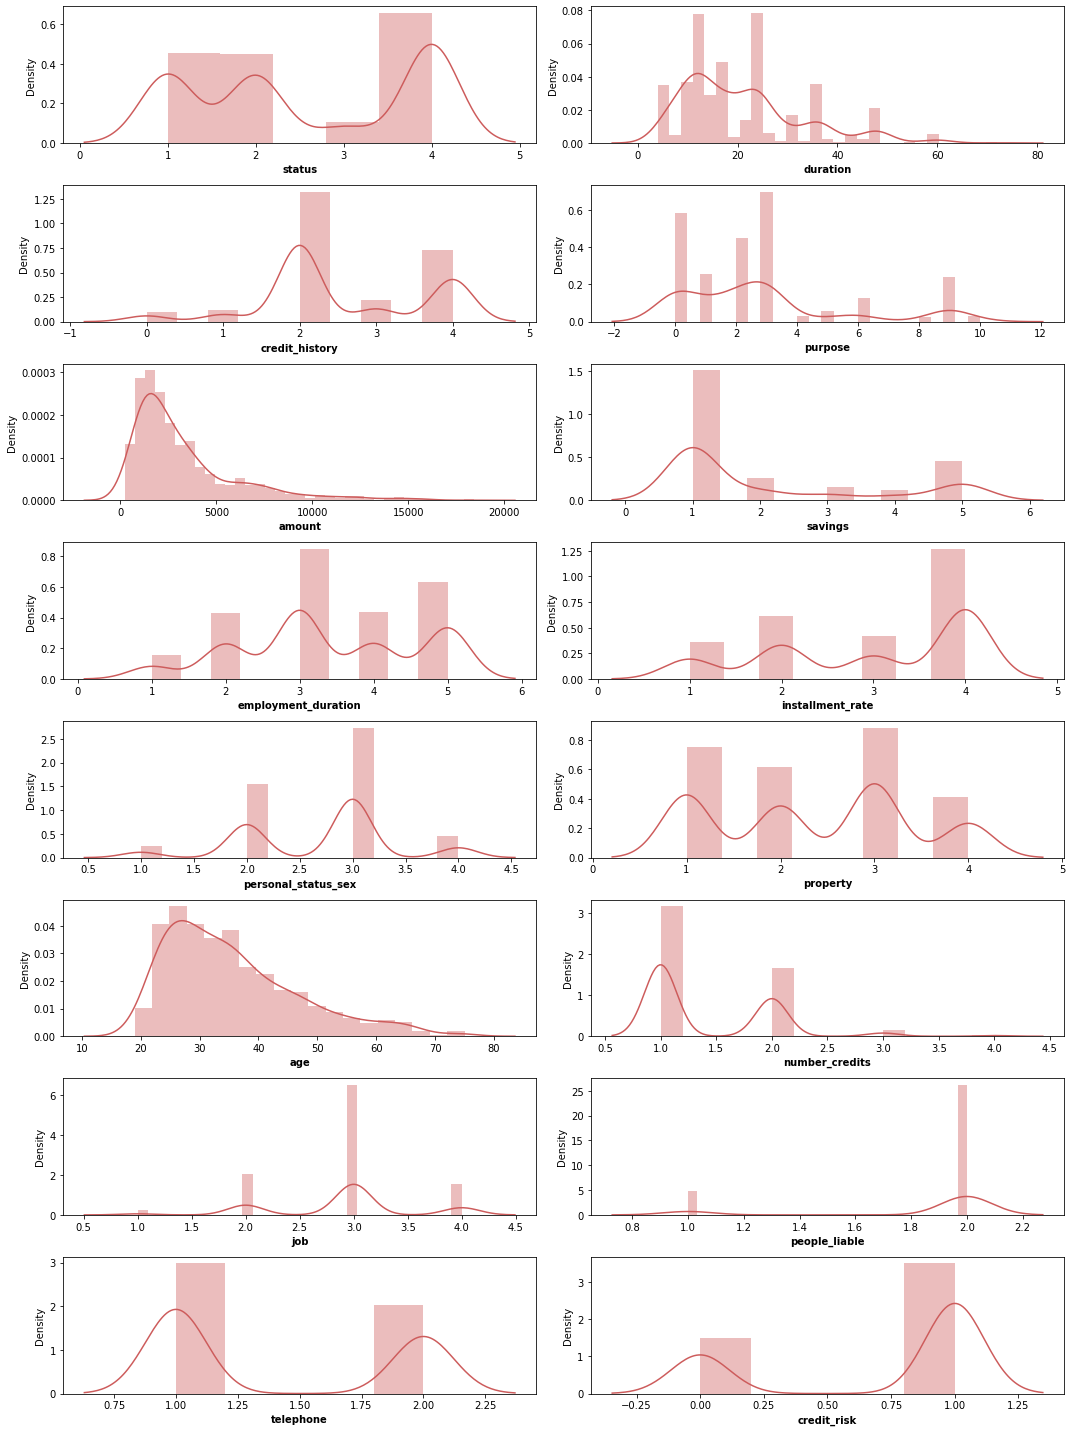

In [108]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_features):
    plt.subplot(8, 2, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

## Boxplot (Numerical fea)

In [28]:
print(len(df.columns),df.columns)

16 Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'property', 'age', 'number_credits', 'job', 'people_liable',
       'telephone', 'credit_risk'],
      dtype='object')


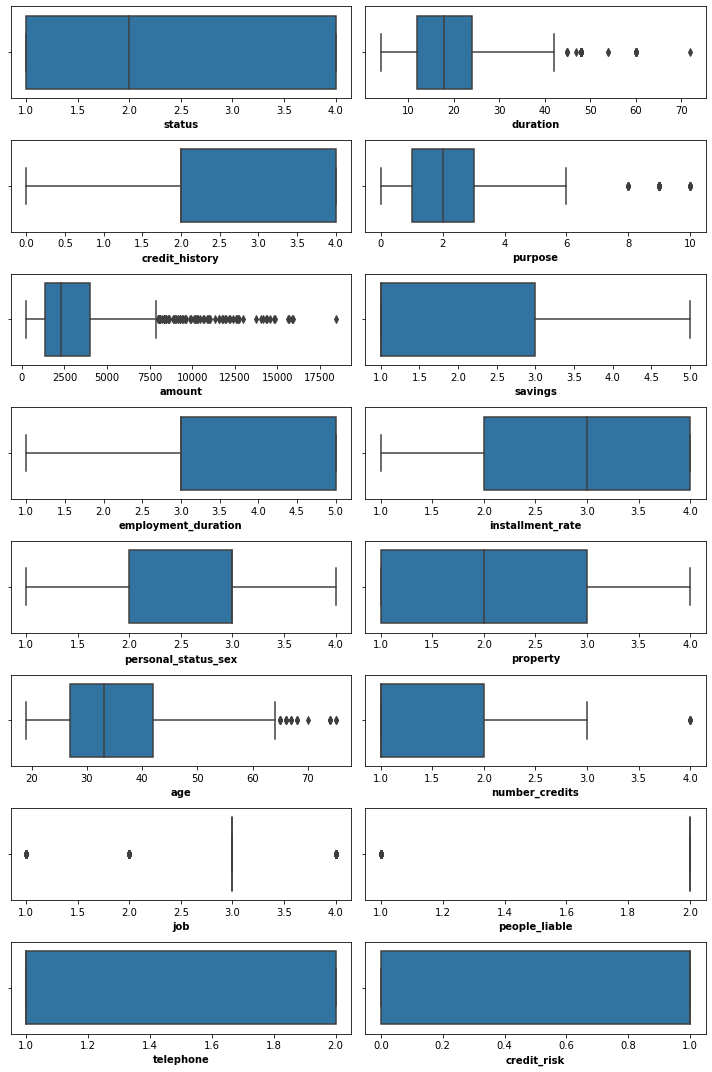

In [29]:
plt.figure(figsize=(10,15))
for i,col in enumerate(df.columns):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()
     

## Countplot

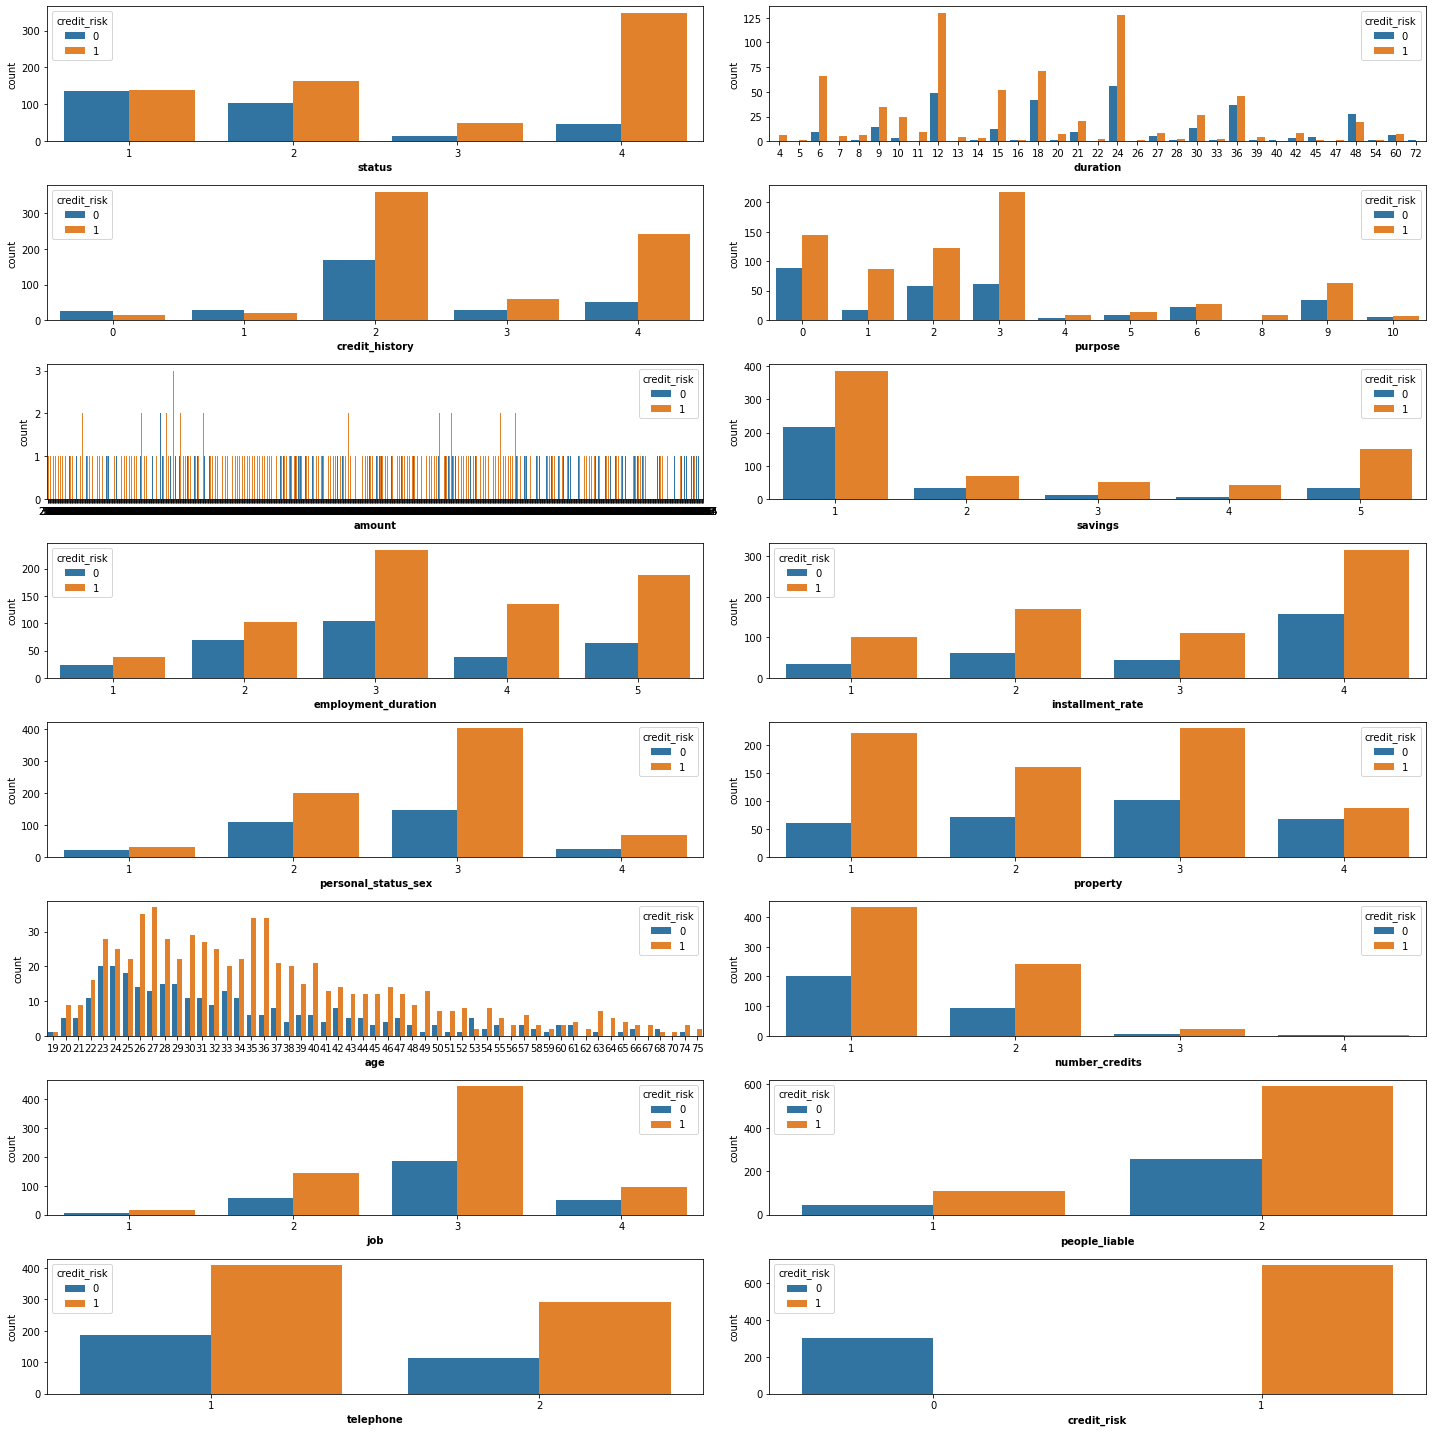

In [34]:
plt.figure(figsize=(20,20))
for i,col in enumerate(df.columns):
    plt.subplot(8,2,i+1)
    sns.countplot(x=df[col],hue=df['credit_risk'])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

## Barplot

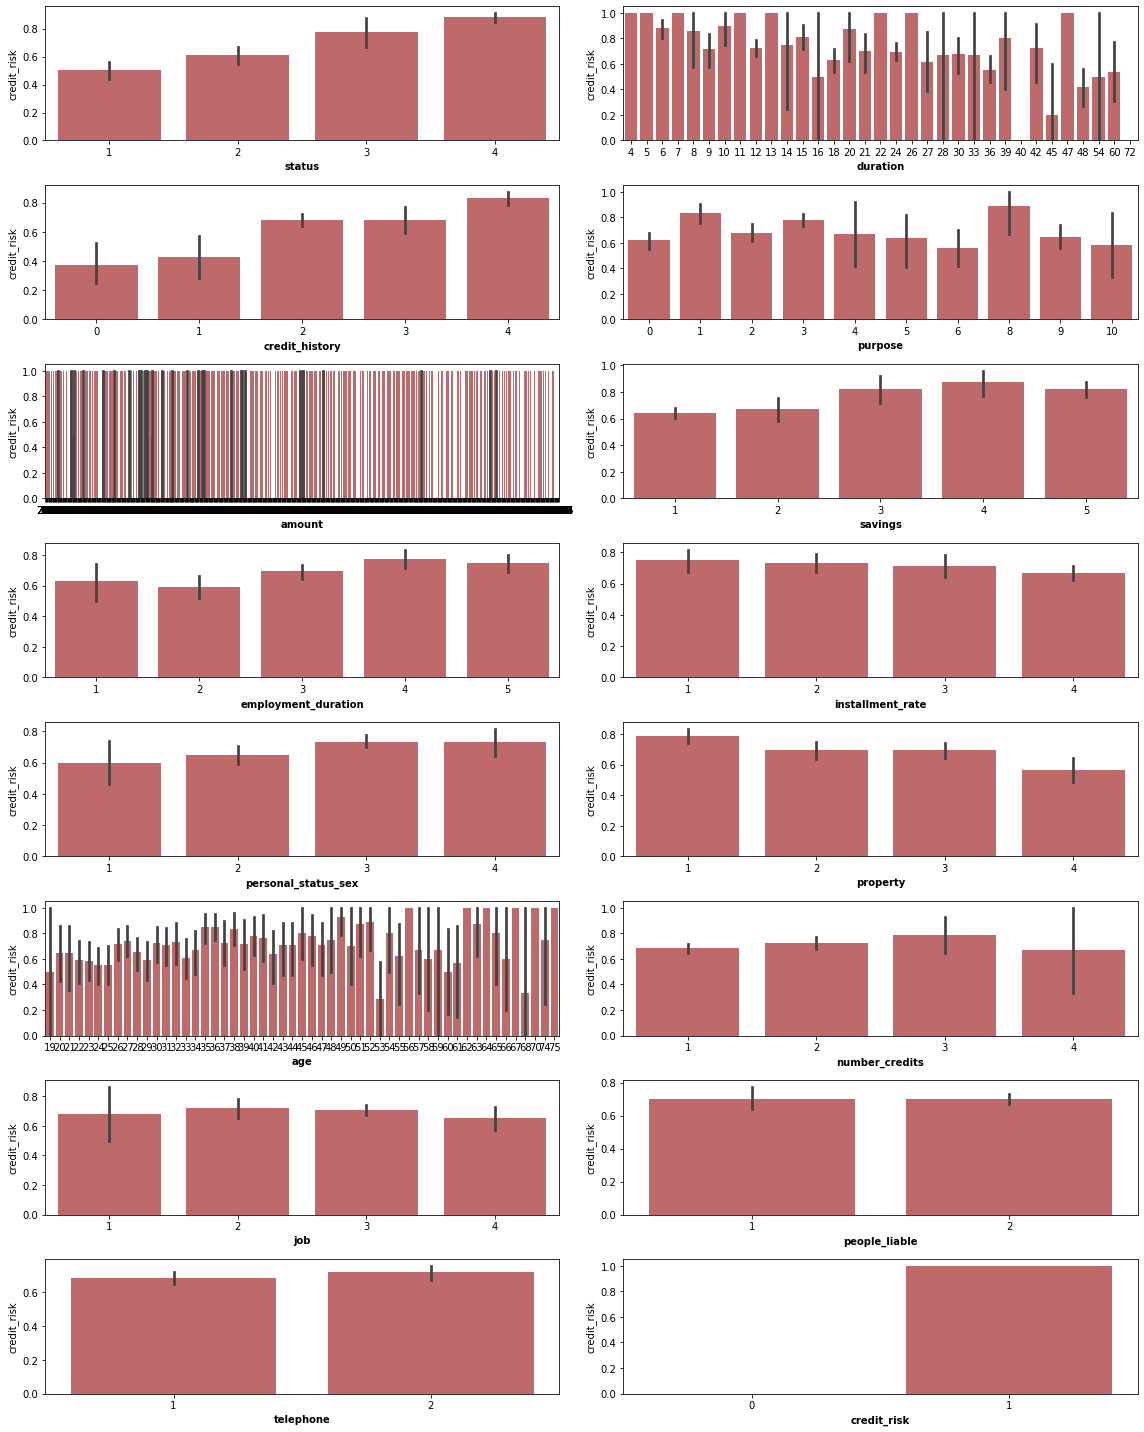

In [36]:
plt.figure(figsize=(16,20))
for i,col in enumerate(df.columns):
    plt.subplot(8,2,i+1)
    sns.barplot(x=df[col],y=df['credit_risk'],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [37]:
df.corr()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
status,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.032260,0.058631,0.076005,0.040663,0.014145,0.066296,0.350847
duration,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,0.303971,-0.037550,-0.011284,0.210910,0.023834,0.164718,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.053777,0.146337,0.437066,0.010350,-0.011550,0.052370,0.228785
purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,0.010966,-0.000892,0.054935,0.008085,0.032577,0.078371,-0.017979
amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,0.311602,0.032273,0.020785,0.285393,-0.017144,0.277000,-0.154740
savings,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,0.018948,0.083434,-0.021644,0.011709,-0.027514,0.087208,0.178943
employment_duration,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,0.087187,0.259116,0.125791,0.101225,-0.097192,0.060518,0.116002
installment_rate,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,0.053391,0.057271,0.021669,0.097755,0.071207,0.014413,-0.072404
personal_status_sex,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,-0.006940,0.005150,0.064672,-0.011956,-0.122165,0.027275,0.088184
property,-0.032260,0.303971,-0.053777,0.010966,0.311602,0.018948,0.087187,0.053391,-0.006940,1.000000,0.074551,-0.007765,0.276149,-0.011872,0.196802,-0.142612


<Axes: >

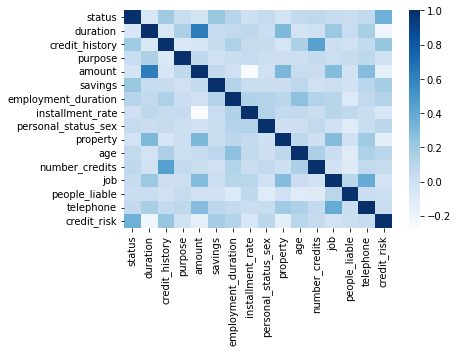

In [38]:
sns.heatmap(df.corr(),cmap='Blues')
     

In [39]:
# spliting X and y for all experiments
     

X =df.drop('credit_risk',axis=1)
y = df['credit_risk']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3, random_state=42)

In [42]:
print(X_train.shape, y_train.shape)
  

print(X_test.shape, y_test.shape)
     

(700, 15) (700,)
(300, 15) (300,)


In [43]:
# Standardize or feature scalling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
     

X_test = scaler.transform(X_test)
     

X_train
     

array([[-0.46675051,  2.20026042, -0.50954022, ...,  0.09613864,
        -2.40751251,  1.14798989],
       [ 1.12315391, -0.02543654,  1.34815849, ...,  0.09613864,
         0.41536648,  1.14798989],
       [ 1.12315391,  0.22186313,  0.41930914, ...,  0.09613864,
         0.41536648, -0.87108781],
       ...,
       [ 1.12315391,  2.20026042, -0.50954022, ...,  0.09613864,
         0.41536648, -0.87108781],
       [ 1.12315391, -1.17950162,  0.41930914, ...,  0.09613864,
         0.41536648, -0.87108781],
       [-0.46675051,  0.22186313,  0.41930914, ...,  1.62561703,
         0.41536648,  1.14798989]])

In [45]:
X_test

array([[ 1.12315391,  1.21106177, -0.50954022, ...,  1.62561703,
         0.41536648,  1.14798989],
       [ 1.12315391, -0.2727362 ,  1.34815849, ...,  0.09613864,
         0.41536648, -0.87108781],
       [ 1.12315391, -0.76733552, -0.50954022, ..., -1.43333974,
         0.41536648, -0.87108781],
       ...,
       [-1.26170273, -0.76733552, -0.50954022, ...,  0.09613864,
         0.41536648,  1.14798989],
       [-1.26170273, -1.26193485,  1.34815849, ..., -1.43333974,
        -2.40751251, -0.87108781],
       [ 1.12315391,  0.22186313,  1.34815849, ..., -1.43333974,
         0.41536648, -0.87108781]])

## 6.Model Training

In [46]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [47]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(99)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Random Forest': 0.76,
 'Decision Tree': 0.6933333333333334,
 'Gradient Boosting': 0.75,
 'Logistic Regression': 0.7333333333333333,
 'K-Neighbors Classifier': 0.7233333333333334,
 'XGBClassifier': 0.74,
 'CatBoosting Classifier': 0.77,
 'AdaBoost Classifier': 0.7333333333333333}

## 7.Choose best model

In [52]:
cbc = CatBoostClassifier()

In [53]:
cbc.fit(X_train,y_train)

Learning rate set to 0.008847
0:	learn: 0.6896608	total: 1.52ms	remaining: 1.52s
1:	learn: 0.6864082	total: 2.71ms	remaining: 1.35s
2:	learn: 0.6835522	total: 3.74ms	remaining: 1.24s
3:	learn: 0.6798138	total: 5.02ms	remaining: 1.25s
4:	learn: 0.6771381	total: 6.4ms	remaining: 1.27s
5:	learn: 0.6734984	total: 7.83ms	remaining: 1.3s
6:	learn: 0.6696526	total: 9.27ms	remaining: 1.31s
7:	learn: 0.6663211	total: 10.8ms	remaining: 1.34s
8:	learn: 0.6622743	total: 12.4ms	remaining: 1.36s
9:	learn: 0.6591090	total: 14.6ms	remaining: 1.44s
10:	learn: 0.6563913	total: 16.4ms	remaining: 1.47s
11:	learn: 0.6532067	total: 17.9ms	remaining: 1.48s
12:	learn: 0.6502367	total: 19.4ms	remaining: 1.47s
13:	learn: 0.6472035	total: 21ms	remaining: 1.48s
14:	learn: 0.6442050	total: 22.5ms	remaining: 1.48s
15:	learn: 0.6414013	total: 24.1ms	remaining: 1.48s
16:	learn: 0.6382709	total: 25.6ms	remaining: 1.48s
17:	learn: 0.6348291	total: 27.1ms	remaining: 1.48s
18:	learn: 0.6316308	total: 28.8ms	remaining: 1.

In [54]:
pred = cbc.predict(X_test)
percentage = cbc.score(X_test,y_test)
percentage

0.77

In [55]:
print(f"training accuracy : {cbc.score(X_train,y_train)}")
print(f"testing accuracy : {cbc.score(X_test,y_test)} ")

training accuracy : 0.9671428571428572
testing accuracy : 0.77 


In [56]:
confusion = confusion_matrix(y_test,pred)
print(f" confusion matrix {confusion}")

 confusion matrix [[ 47  45]
 [ 24 184]]


In [57]:
print(f" calssification_report {classification_report(y_test,pred)}")

 calssification_report               precision    recall  f1-score   support

           0       0.66      0.51      0.58        92
           1       0.80      0.88      0.84       208

    accuracy                           0.77       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.76      0.77      0.76       300



##  imbalanced data handling technique
### Using SMOTE Algorithm

In [71]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 700
Before OverSampling, counts of label '0': 300 

After OverSampling, the shape of train_X: (1400, 15)
After OverSampling, the shape of train_y: (1400,) 

After OverSampling, counts of label '1': 700
After OverSampling, counts of label '0': 700


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X_res,y_res,test_size=0.3, random_state=42)

In [73]:
print(X_train.shape, y_train.shape)
  

print(X_test.shape, y_test.shape)

(980, 15) (980,)
(420, 15) (420,)


In [74]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(99)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Random Forest': 0.819047619047619,
 'Decision Tree': 0.7285714285714285,
 'Gradient Boosting': 0.8142857142857143,
 'Logistic Regression': 0.7642857142857142,
 'K-Neighbors Classifier': 0.6261904761904762,
 'XGBClassifier': 0.8071428571428572,
 'CatBoosting Classifier': 0.8333333333333334,
 'AdaBoost Classifier': 0.7904761904761904}

In [75]:
cbc2 = CatBoostClassifier()

In [78]:
cbc2.fit(X_train,y_train)

Learning rate set to 0.010214
0:	learn: 0.6891055	total: 1.64ms	remaining: 1.64s
1:	learn: 0.6849531	total: 3.1ms	remaining: 1.54s
2:	learn: 0.6809929	total: 4.51ms	remaining: 1.5s
3:	learn: 0.6775997	total: 5.93ms	remaining: 1.48s
4:	learn: 0.6732391	total: 7.31ms	remaining: 1.45s
5:	learn: 0.6697743	total: 8.41ms	remaining: 1.39s
6:	learn: 0.6660922	total: 9.8ms	remaining: 1.39s
7:	learn: 0.6630031	total: 11.5ms	remaining: 1.43s
8:	learn: 0.6593871	total: 13.1ms	remaining: 1.44s
9:	learn: 0.6562307	total: 14.5ms	remaining: 1.43s
10:	learn: 0.6525138	total: 15.8ms	remaining: 1.42s
11:	learn: 0.6494257	total: 17.3ms	remaining: 1.42s
12:	learn: 0.6461156	total: 19.2ms	remaining: 1.45s
13:	learn: 0.6427389	total: 20.6ms	remaining: 1.45s
14:	learn: 0.6395680	total: 22ms	remaining: 1.45s
15:	learn: 0.6362795	total: 23.4ms	remaining: 1.44s
16:	learn: 0.6333268	total: 25ms	remaining: 1.45s
17:	learn: 0.6302546	total: 26.6ms	remaining: 1.45s
18:	learn: 0.6273703	total: 28ms	remaining: 1.45s
1

In [79]:
pred2 = cbc2.predict(X_test)
percentage = cbc2.score(X_test,y_test)
percentage

0.8333333333333334

In [81]:
print(f"training accuracy : {cbc2.score(X_train,y_train)}")
print(f"testing accuracy : {cbc2.score(X_test,y_test)} ")

training accuracy : 0.9642857142857143
testing accuracy : 0.8333333333333334 


In [83]:
confusion = confusion_matrix(y_test,pred2)
print(f" confusion matrix {confusion}")

 confusion matrix [[179  29]
 [ 41 171]]


In [85]:
print(f" calssification_report {classification_report(y_test,pred2)}")

 calssification_report               precision    recall  f1-score   support

           0       0.81      0.86      0.84       208
           1       0.85      0.81      0.83       212

    accuracy                           0.83       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.83      0.83       420



## ROC curve

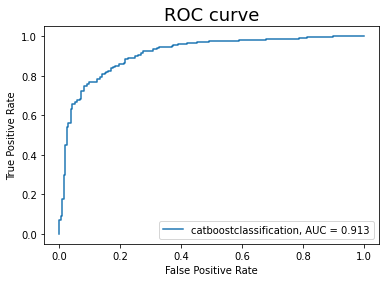

In [97]:
#Catboostclassifier
preds_proba_xgb = cbc2.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'catboostclassification, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

## Feature Importance

Text(0.5, 1.0, 'Feature Importance')

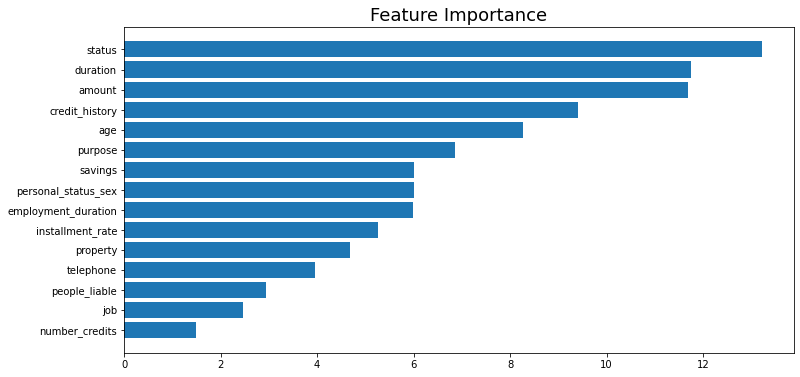

In [101]:

feature_importance = cbc2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
